# 시즌 별 상대승률 변동과 그 원인에 대해서 찾기
### 시즌별 상대 승률 구하기

In [1]:
import pandas as pd

In [2]:
def load_Data(name, path = "https://raw.githubusercontent.com/dojinyou/Bigcontest_2020/master/Data/sheet_season_csv/", 
    years = ['2016','2017','2018','2019','2020']):
    PATH = path
    df = pd.DataFrame()
    is_head = True
    for year in years:
        if is_head:
            df = pd.read_csv(PATH + name +'_'+year+'.csv', encoding='CP949')
            is_head=False
        else :
            new_df = pd.read_csv(PATH + name+'_'+year+'.csv', encoding='CP949')
            df = pd.concat([df, new_df])
    return df

In [3]:
def get_team_win_rate(year):
    # data load
    game = load_Data('game', years =[str(year)])
    team_pitcher = load_Data('team_pitcher', years =[str(year)])
    # merge
    game_result = pd.merge(team_pitcher, game, on=['G_ID'], how = 'left')
    # drop Non necessary columns
    game_result = game_result[['T_ID','VS_T_ID','WLS']]
    # WLS factor to numeric
    # 'W':1, 'D':0.5, 'L':0
    game_result['WLS'].replace(['W','D','L'],[1,0.5,0],inplace = True)
    # groupby for win rate
    game_result = game_result.groupby(by=['T_ID','VS_T_ID']).sum()
    # win rate calculrate
    game_result['WLS'] = game_result['WLS']/16
    # change col name
    col_name = 'WLS_'+str(year)
    game_result.columns = [col_name]
    return game_result

In [4]:
def get_win_rate_by_season(years = ['2016','2017','2018','2019']):
    win_rate = pd.DataFrame()
    is_head = True
    for year in years:
        win_rate_year = get_team_win_rate(year)
        if is_head :
            win_rate = win_rate_year
            is_head = False
        else :
            win_rate = win_rate.join(win_rate_year,how='left')
    return win_rate.reset_index()

In [7]:
win_rate = get_win_rate_by_season()
win_rate.head()

,T_ID,VS_T_ID,WLS_2016,WLS_2017,WLS_2018,WLS_2019
0,HH,HT,0.43750,0.31250,0.5625,0.2500
1,HH,KT,0.46875,0.75000,0.6250,0.5000
2,HH,LG,0.43750,0.56250,0.5625,0.4375
3,HH,LT,0.50000,0.31250,0.6250,0.5000
4,HH,NC,0.46875,0.40625,0.5625,0.4375


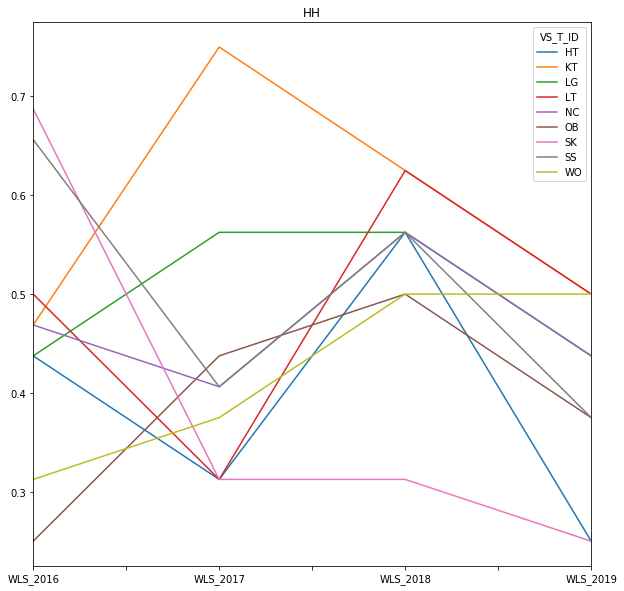

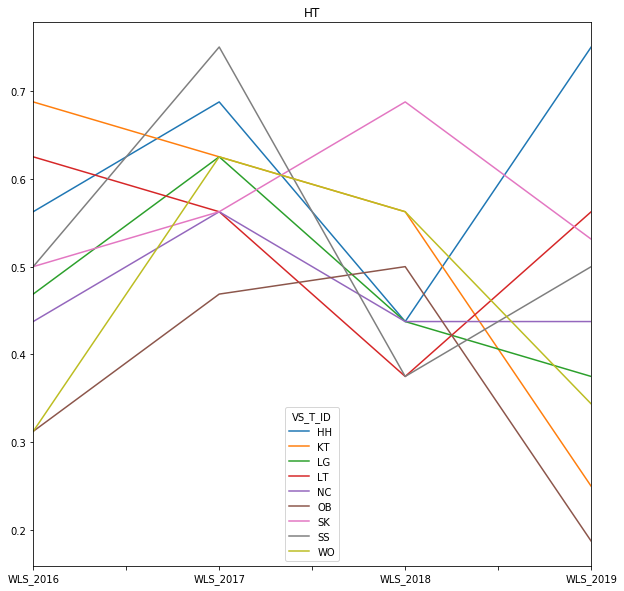

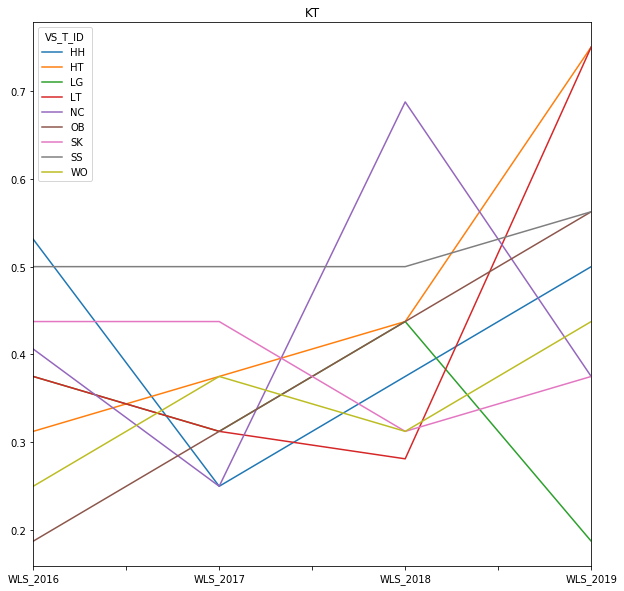

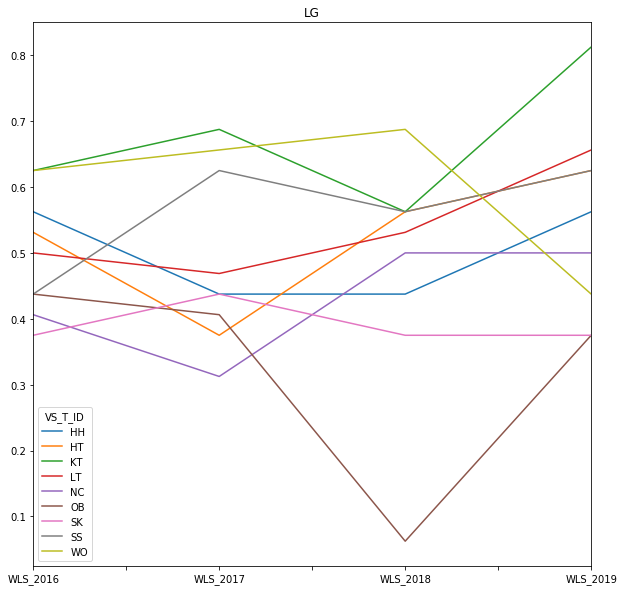

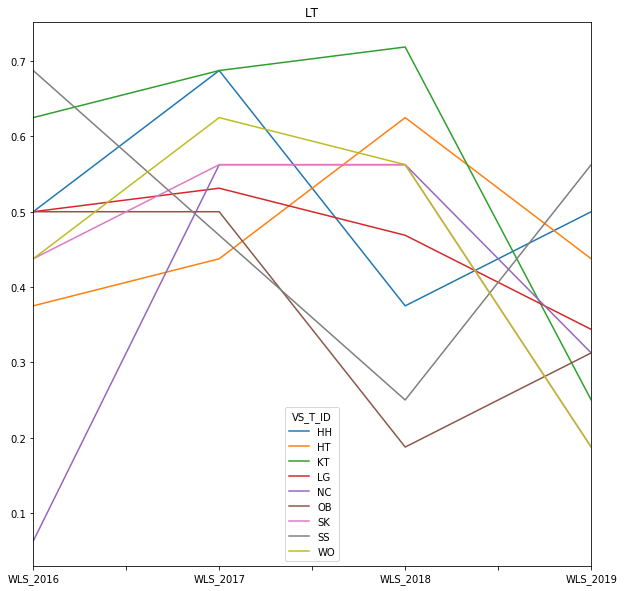

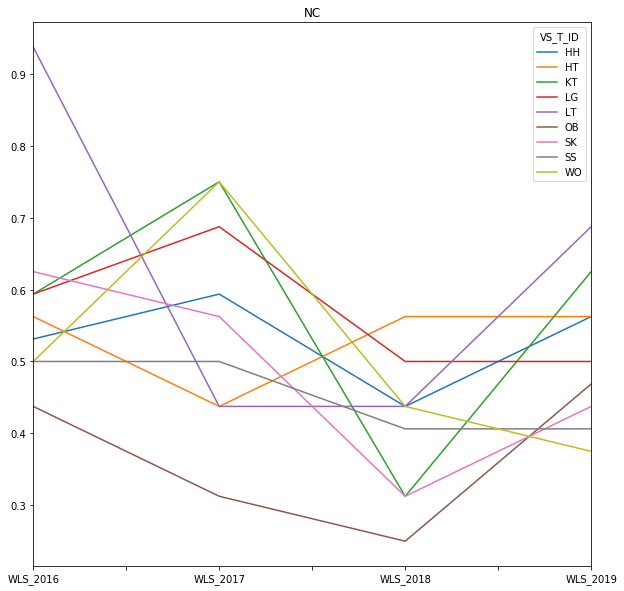

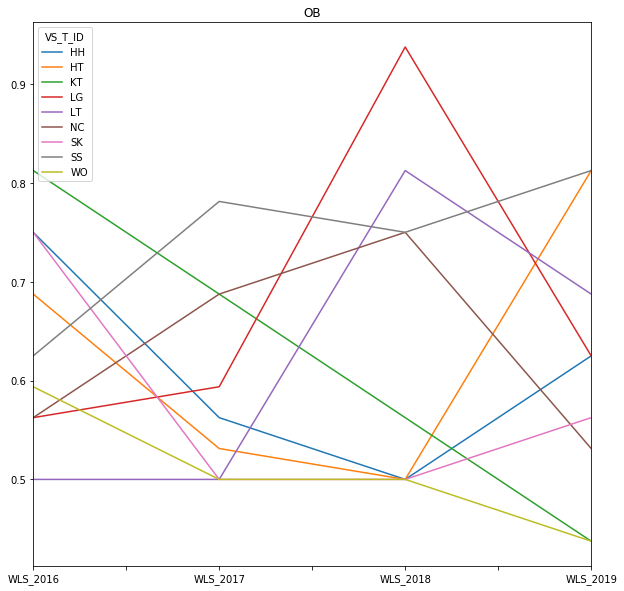

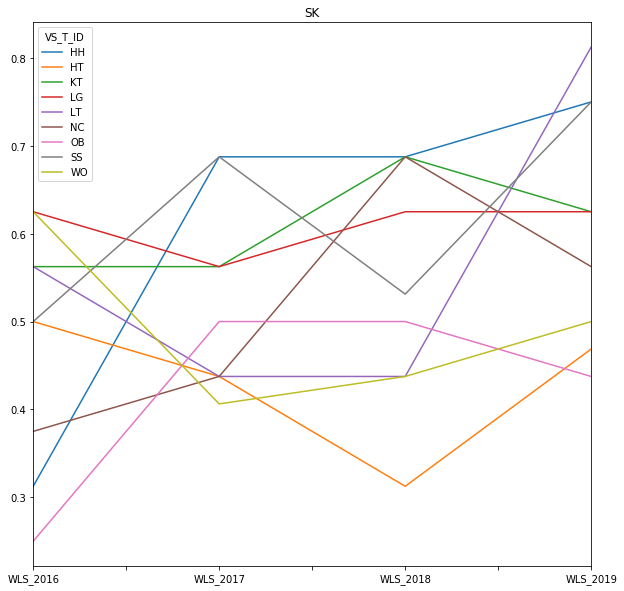

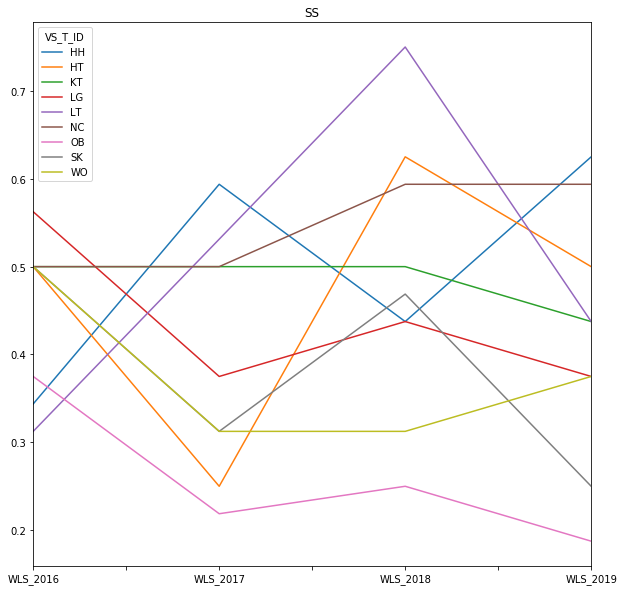

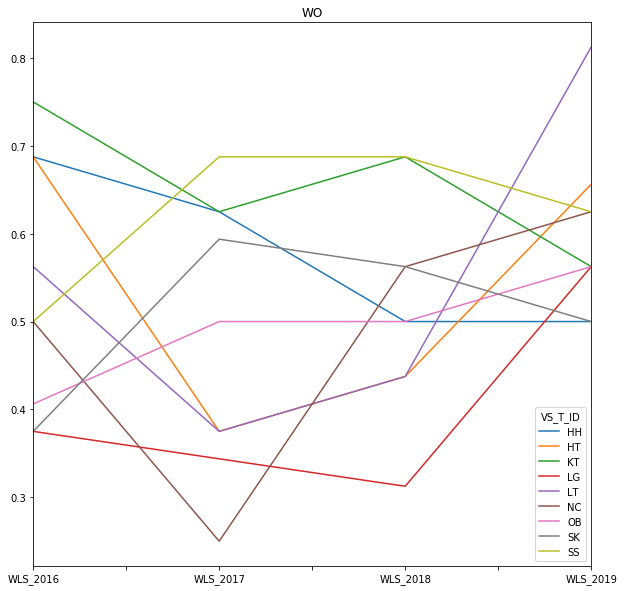

In [8]:
team_names = ['HH','HT','KT','LG','LT','NC','OB','SK','SS','WO']
for team_name in team_names:
    df = win_rate[win_rate['T_ID']==team_name].set_index('VS_T_ID')
    df = df.drop('T_ID',axis=1)
    df.T.plot(title = team_name,figsize=(10,10))